- Name: `Samip Regmi`
- Group: `L5CG4`
- University ID: `2511198`
- Idenfication Number: `np02cs4a240105`
- Submitted To: `Ayush Regmi Sir`

- Problem Statement:
Nepal' s complex geography and monsoon dependent climate result in highly variable precipitation patterns, increasing the risk of floods, landslides, and droughts. Accurate prediction of daily rainfall using machine learning and meteorological data can support disaster risk management, agricultural planning and development.

- Dataset:
The dataset used in this analysis is a rainfall prediction from Kaggle. The dataset aligns with the United Nations Sustainable Development Goals (UNSDG), particularly UNSDG 13: Climate Action, by supporting improved understanding of rainfall patterns and climate-related risk management.

# Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix)
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge

## Dataset

In [ ]:
df_reg = pd.read_csv("/content/drive/MyDrive/FINAL_AI_WORK/TIA-WEATHER-DATA-2015-01-01-TO-2025-06-30.csv")

## Dropping unwanted features

In [ ]:
drop_cols = ["datetime", "sunrise", "sunset", "preciptype", "severerisk"]
df_reg.drop(columns=drop_cols, inplace=True, errors="ignore")

## Data Exploration

- [x] display the first 10 rows

In [ ]:
df_reg.head(10)

,tempmax,tempmin,temp,dew,humidity,precipprob,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,precipitation
0,60.7,39.1,50.0,41.7,74.7,100,4.17,11.2,5.8,166.0,1020.4,79.1,2.4,96.6,8.3,4,0.8
1,71.0,49.9,54.9,48.4,80.1,100,20.83,19.9,9.2,26.0,1022.2,93.3,2.9,40.4,3.3,2,0.0
2,67.7,48.1,54.8,50.5,86.3,100,8.33,15.4,15.7,304.8,1021.0,90.3,2.8,58.6,5.0,4,0.5
3,69.9,48.1,54.5,49.6,85.5,100,4.17,17.0,9.2,252.4,1018.1,67.1,2.7,118.0,10.3,6,0.5
4,64.3,42.7,51.3,45.7,83.2,0,0.00,16.3,10.3,213.3,1013.9,41.6,3.9,139.2,12.0,6,0.0
5,62.5,46.3,52.2,45.0,78.0,0,0.00,16.1,10.3,243.1,1016.4,62.5,3.7,98.8,8.5,5,0.0
6,60.7,43.4,50.3,43.1,77.8,0,0.00,15.7,10.3,233.9,1017.1,65.7,3.4,102.8,8.9,5,0.0
7,71.7,39.1,49.3,41.5,76.4,100,4.17,15.7,6.9,203.0,1018.9,50.1,3.9,114.1,9.7,5,0.0
8,64.3,39.1,48.4,38.7,72.8,0,0.00,15.4,9.2,58.0,1020.3,24.0,3.8,173.6,14.8,7,0.0
9,67.9,35.5,47.9,35.7,68.2,0,0.00,12.1,8.1,280.9,1018.8,22.9,3.9,190.1,16.2,7,0.0


- [x] Count the number of rows and columns

In [ ]:
rows, columns = df_reg.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 3468
Number of columns: 17


- [x] List all column names and their data types.

In [ ]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           3468 non-null   float64
 1   tempmin           3468 non-null   float64
 2   temp              3468 non-null   float64
 3   dew               3468 non-null   float64
 4   humidity          3468 non-null   float64
 5   precipprob        3468 non-null   int64  
 6   precipcover       3468 non-null   float64
 7   windgust          3468 non-null   float64
 8   windspeed         3468 non-null   float64
 9   winddir           3468 non-null   float64
 10  sealevelpressure  3468 non-null   float64
 11  cloudcover        3468 non-null   float64
 12  visibility        3468 non-null   float64
 13  solarradiation    3468 non-null   float64
 14  solarenergy       3468 non-null   float64
 15  uvindex           3468 non-null   int64  
 16  precipitation     3468 non-null   float64


- [x] Check for missing values in each column and report total counts.

In [ ]:
df_reg.isnull().sum()

,0
tempmax,0
tempmin,0
temp,0
dew,0
humidity,0
precipprob,0
precipcover,0
windgust,0
windspeed,0
winddir,0


- [x] Correlation of features with labels

In [ ]:
correlation_with_target = df_reg.corr()['precipitation'].sort_values(ascending=False)
print(correlation_with_target)

precipitation       1.000000
humidity            0.371200
dew                 0.359616
precipprob          0.344041
tempmin             0.318262
cloudcover          0.308921
precipcover         0.285340
temp                0.259605
tempmax             0.162180
visibility          0.033973
windgust           -0.025089
windspeed          -0.043090
winddir            -0.196513
solarenergy        -0.246560
solarradiation     -0.246705
uvindex            -0.263408
sealevelpressure   -0.328982
Name: precipitation, dtype: float64


- [x] Basic statistics

In [40]:
df_reg.describe()

,tempmax,tempmin,temp,dew,humidity,precipprob,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,precipitation
count,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000,3468.000000
mean,76.085294,57.193829,65.385265,56.108333,75.141984,38.437140,2.515107,17.471943,11.262197,212.394319,1015.438379,47.204123,4.060986,185.324913,15.997030,6.890715,4.088041
std,7.789576,10.985584,9.146426,11.408154,11.479143,48.651647,4.780395,4.169347,5.879100,57.765426,4.398764,24.038376,1.602044,58.836834,5.082941,1.781841,10.769362
min,48.100000,32.100000,44.000000,29.000000,25.200000,0.000000,0.000000,4.700000,3.400000,1.000000,1001.300000,18.800000,1.400000,0.000000,0.000000,0.000000,0.000000
25%,69.700000,48.100000,57.175000,45.700000,69.400000,0.000000,0.000000,15.000000,9.200000,184.175000,1012.100000,25.000000,3.600000,149.875000,12.900000,6.000000,0.000000
50%,76.900000,58.900000,67.600000,56.300000,76.200000,0.000000,0.000000,16.600000,10.300000,214.900000,1015.800000,36.500000,4.100000,182.400000,15.700000,7.000000,0.000000
75%,82.300000,67.900000,73.600000,67.925000,83.300000,100.000000,4.170000,19.000000,12.800000,252.225000,1018.900000,70.100000,4.500000,224.000000,19.300000,8.000000,2.422300
max,102.100000,75.100000,81.000000,74.300000,100.000000,100.000000,62.500000,53.000000,165.800000,356.800000,1025.800000,97.000000,88.600000,340.700000,29.600000,10.000000,164.300000


- [x] Columns

In [41]:
df_reg.columns

Index(['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precipprob',
       'precipcover', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'precipitation'],
      dtype='object')

- [x] Checking for datatypes

In [42]:
df_reg.dtypes

,0
tempmax,float64
tempmin,float64
temp,float64
dew,float64
humidity,float64
precipprob,int64
precipcover,float64
windgust,float64
windspeed,float64
winddir,float64


## Saving cleaned data

In [ ]:
df_reg.to_csv("./precipitation_cleaned.csv")

## Visualization

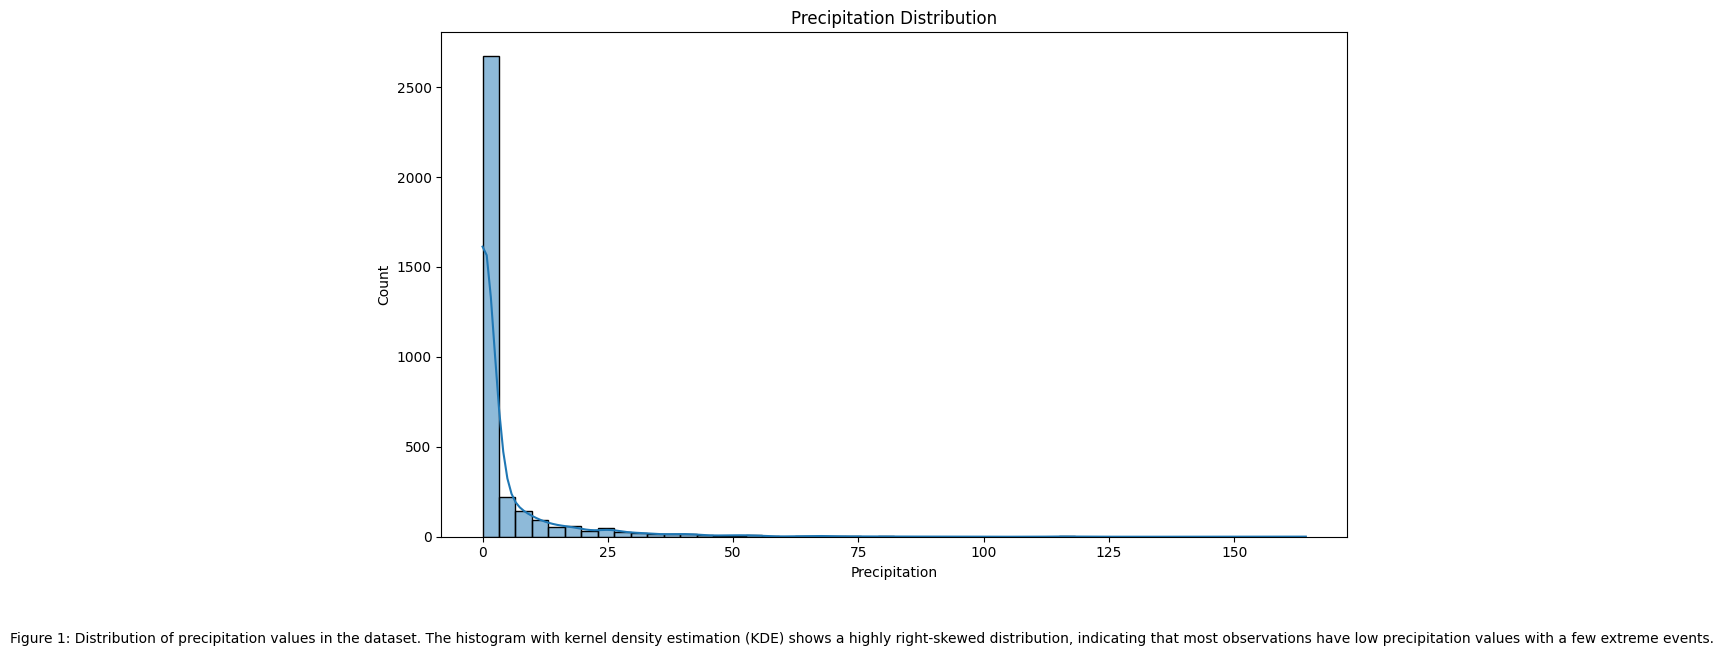

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(df_reg['precipitation'], kde=True, bins=50)
plt.title('Precipitation Distribution')
plt.xlabel('Precipitation')
plt.ylabel('Count')

plt.figtext(
    0.5, -0.08,
    'Figure 1: Distribution of precipitation values in the dataset. '
    'The histogram with kernel density estimation (KDE) shows a highly '
    'right-skewed distribution, indicating that most observations have low '
    'precipitation values with a few extreme events.',
    ha='center',
    fontsize=10
)

plt.tight_layout()
plt.show()


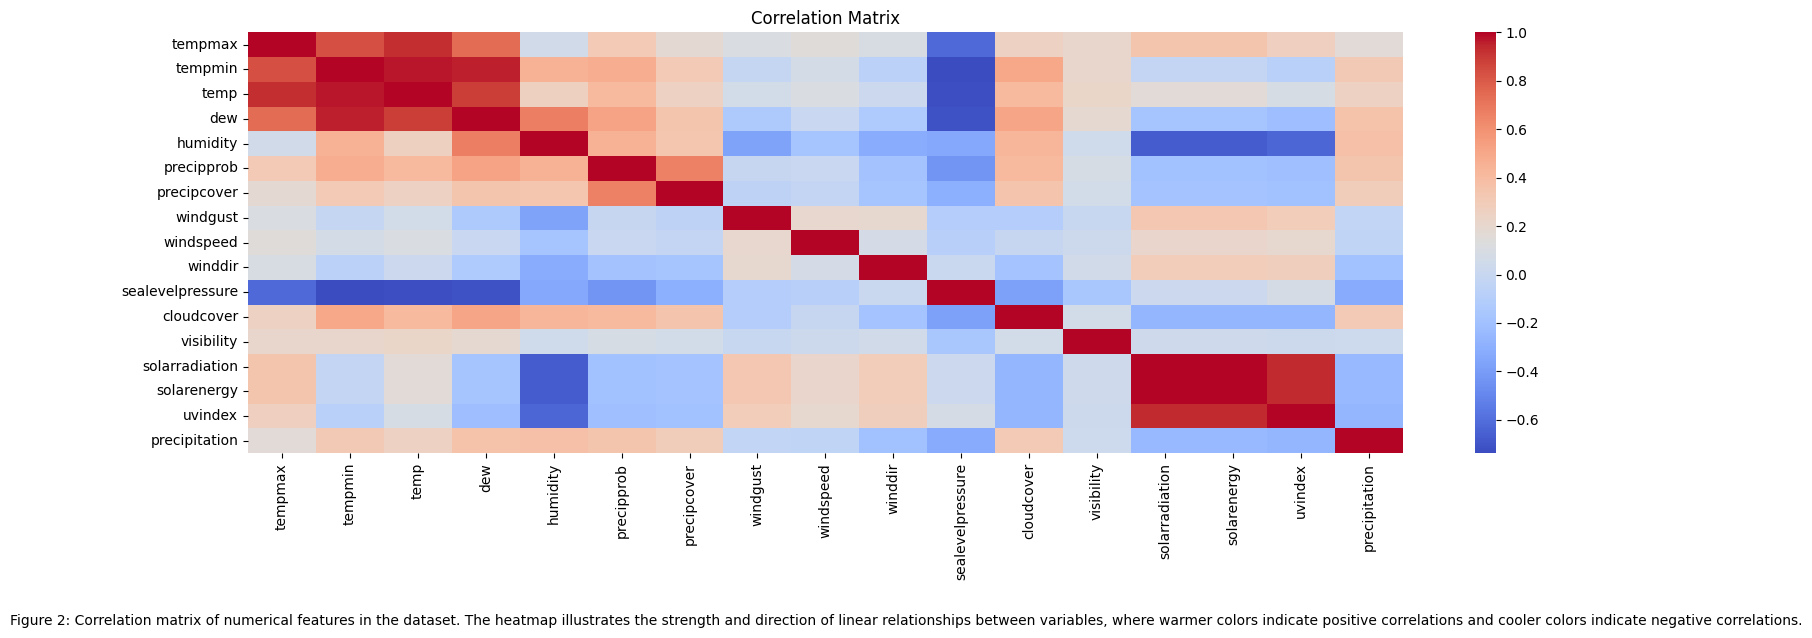

In [ ]:
plt.figure(figsize=(16, 6))

sns.heatmap(df_reg.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')

plt.figtext(
    0.5, -0.05,
    'Figure 2: Correlation matrix of numerical features in the dataset. '
    'The heatmap illustrates the strength and direction of linear '
    'relationships between variables, where warmer colors indicate '
    'positive correlations and cooler colors indicate negative correlations.',
    ha='center',
    fontsize=10
)

plt.tight_layout()
plt.show()



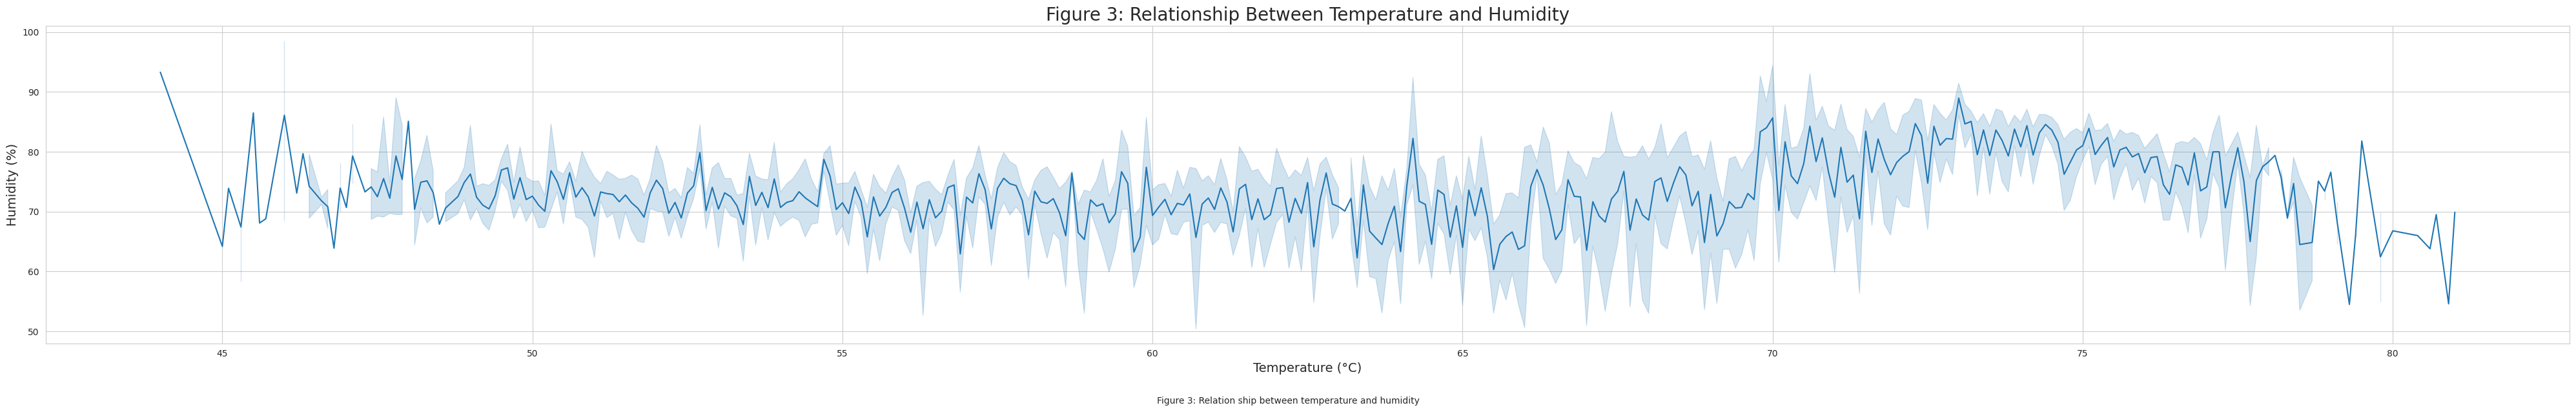

In [ ]:
plt.figure(figsize=(40, 6))
sns.lineplot(x=df_reg['temp'], y=df_reg['humidity'])
plt.title("Figure 3: Relationship Between Temperature and Humidity", fontsize=20)
plt.xlabel("Temperature (°C)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)
plt.figtext(
    0.5, -0.05,
    'Figure 3: Relation ship between temperature and humidity',
    ha='center',
    fontsize=10
)

plt.tight_layout()
plt.show()

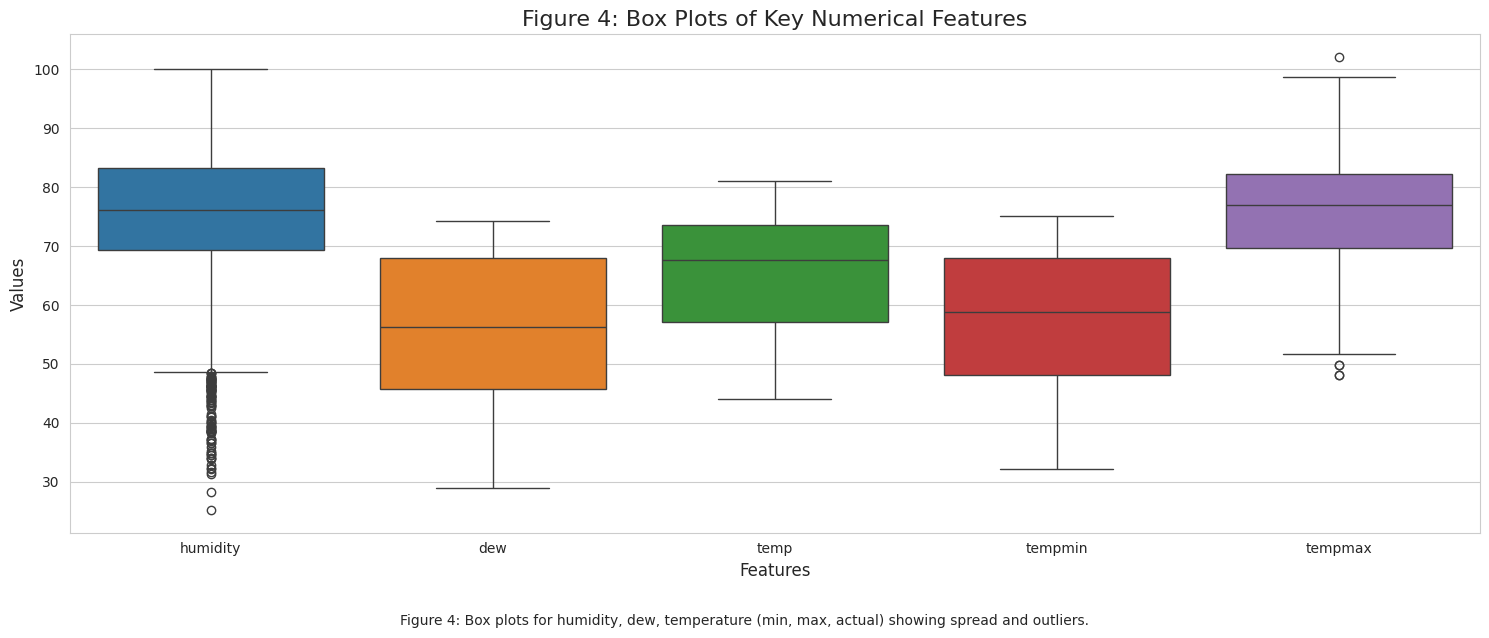

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_reg[['humidity', 'dew', 'temp', 'tempmin', 'tempmax']])
plt.title('Figure 4: Box Plots of Key Numerical Features', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.figtext(
    0.5, -0.05,
    'Figure 4: Box plots for humidity, dew, temperature (min, max, actual) showing spread and outliers.',
    ha='center',
    fontsize=10
)
plt.tight_layout()
plt.show()


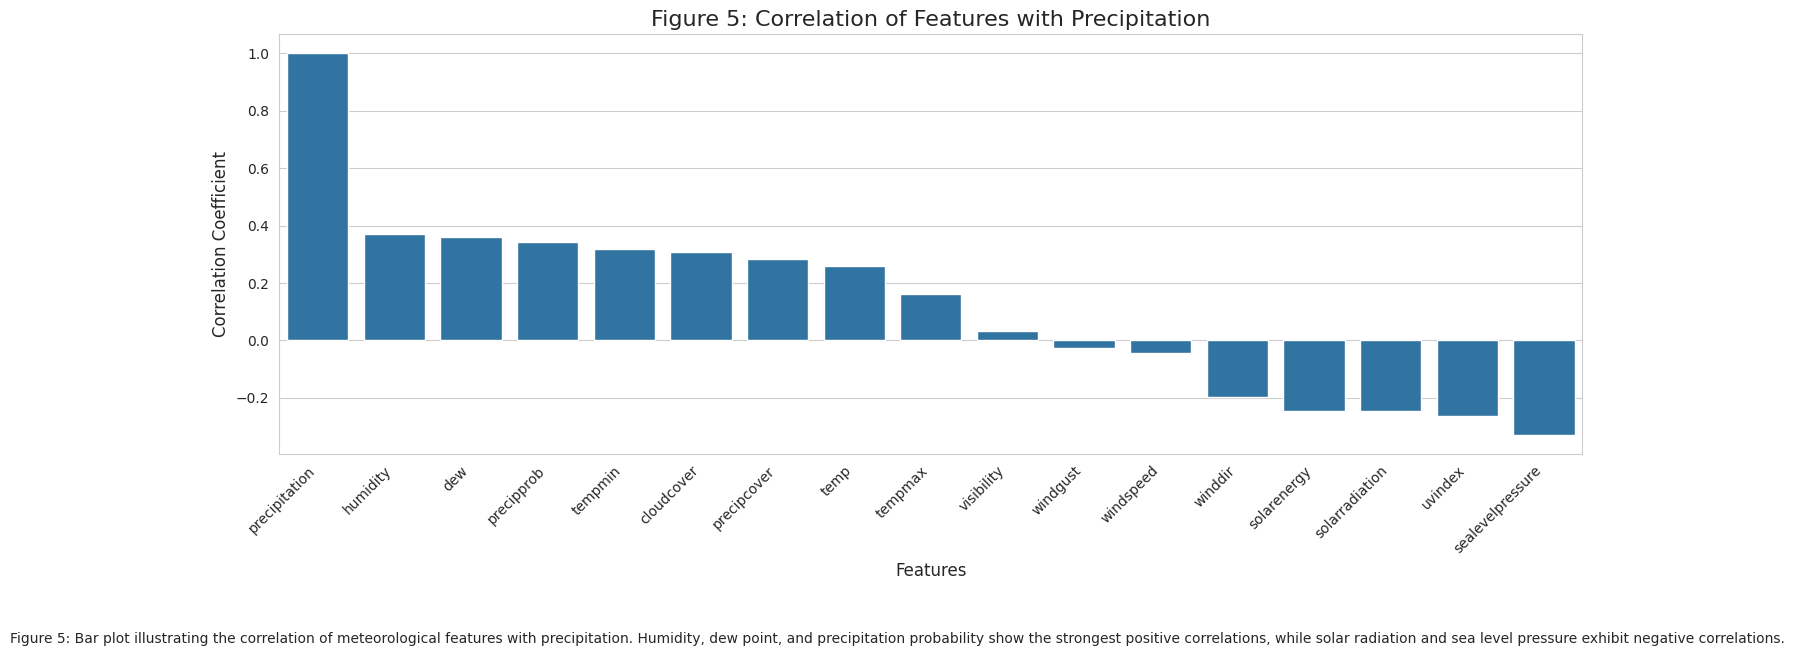

In [ ]:
corr_precip = df_reg.corr()['precipitation'].sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(
    x=corr_precip.index,
    y=corr_precip.values
)

plt.xticks(rotation=45, ha='right')
plt.title('Figure 5: Correlation of Features with Precipitation', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)

plt.figtext(
    0.5, -0.08,
    'Figure 5: Bar plot illustrating the correlation of meteorological features with precipitation. '
    'Humidity, dew point, and precipitation probability show the strongest positive correlations, '
    'while solar radiation and sea level pressure exhibit negative correlations.',
    ha='center',
    fontsize=10
)

plt.tight_layout()
plt.show()


## Feature Selection and Label Selection

In [ ]:
X_reg = df_reg.drop(columns=["precipitation"])
y_reg = df_reg["precipitation"]

## Training and Splitting

In [ ]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

## Scaling

In [ ]:
scaler_r = StandardScaler()
X_train_r_scaled = scaler_r.fit_transform(X_train_r)
X_test_r_scaled = scaler_r.transform(X_test_r)

## Neural Network

In [ ]:
nn_model = MLPRegressor(hidden_layer_sizes=(64, 32),activation='relu',solver='adam',max_iter=1000,random_state=42)
nn_model.fit(X_train_r_scaled, y_train_r)
y_pred_nn = nn_model.predict(X_test_r_scaled)
mse_nn = mean_squared_error(y_test_r, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test_r, y_pred_nn)

print(f"Neural Network Performance:")
print(f"MSE: {mse_nn:.4f}")
print(f"RMSE: {rmse_nn:.4f}")
print(f"R-squared: {r2_nn:.4f}")

Neural Network Performance:
MSE: 115.4611
RMSE: 10.7453
R-squared: 0.1244


## Linear Regression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_r_scaled, y_train_r)
y_pred_lr = lr_model.predict(X_test_r_scaled)

## Random Forest

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_r_scaled, y_train_r)
y_pred_rf = rf_model.predict(X_test_r_scaled)

## Evaluation Function

In [ ]:
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"[{name}] RMSE: {rmse:.4f}, R2: {r2:.4f}")
    return rmse, r2

print("Initial Model Evaluation:")
evaluate_model("Linear Regression", y_test_r, y_pred_lr)
evaluate_model("Random Forest", y_test_r, y_pred_rf)

Initial Model Evaluation:
[Linear Regression] RMSE: 9.6410, R2: 0.2951
[Random Forest] RMSE: 9.5824, R2: 0.3036


(np.float64(9.582406302289714), 0.3036416377080948)

## Hyperparameter Optimization for Linear Regression

In [ ]:
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train_r_scaled, y_train_r)

print(f"Best Ridge Params: {grid_ridge.best_params_}")
print(f"Best Ridge CV Score (Neg MSE): {grid_ridge.best_score_:.4f}")

Best Ridge Params: {'alpha': 0.1}
Best Ridge CV Score (Neg MSE): -86.8148


## Hyperparameter Optimization for Random Forest

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train_r_scaled, y_train_r)

print(f"Best Random Forest Params: {grid_rf.best_params_}")
print(f"Best RF CV Score (Neg MSE): {grid_rf.best_score_:.4f}")

Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best RF CV Score (Neg MSE): -88.0537


## Feature Selection using Random Forest

In [ ]:
selector = SelectFromModel(estimator=grid_rf.best_estimator_, threshold='mean')
selector.fit(X_train_r_scaled, y_train_r)

X_train_sel = selector.transform(X_train_r_scaled)
X_test_sel = selector.transform(X_test_r_scaled)

selected_indices = selector.get_support(indices=True)
selected_features = X_reg.columns[selected_indices]

print(f"Selected {len(selected_features)} Features: {list(selected_features)}")

Selected 3 Features: ['humidity', 'sealevelpressure', 'cloudcover']


## Final Linear Regression Model

In [ ]:
final_ridge = Ridge(**grid_ridge.best_params_)
final_ridge.fit(X_train_sel, y_train_r)
y_pred_final_ridge = final_ridge.predict(X_test_sel)

## Final Random Forest Model

In [ ]:
final_rf = RandomForestRegressor(**grid_rf.best_params_, random_state=42)
final_rf.fit(X_train_sel, y_train_r)
y_pred_final_rf = final_rf.predict(X_test_sel)

## Final Evaluation

In [ ]:
rmse_ridge_final, r2_ridge_final = evaluate_model("Final Ridge", y_test_r, y_pred_final_ridge)
rmse_rf_final, r2_rf_final = evaluate_model("Final RF", y_test_r, y_pred_final_rf)

results_data = {
    "Model": ["Linear Regression", "Random Forest"],
    "Features Used": [len(selected_features), len(selected_features)],
    "CV Score (MSE)": [round(-grid_ridge.best_score_, 4), round(-grid_rf.best_score_, 4)],
    "Test RMSE": [round(rmse_ridge_final, 4), round(rmse_rf_final, 4)],
    "Test R-squared": [round(r2_ridge_final, 4), round(r2_rf_final, 4)]
}

df_results = pd.DataFrame(results_data)
print("\nTable 2: Comparison of Final Regression Models")
display(df_results)

[Final Ridge] RMSE: 10.1856, R2: 0.2132
[Final RF] RMSE: 10.1227, R2: 0.2229

Table 2: Comparison of Final Regression Models


,Model,Features Used,CV Score (MSE),Test RMSE,Test R-squared
0,Linear Regression,3,86.8148,10.1856,0.2132
1,Random Forest,3,88.0537,10.1227,0.2229


- Key Findings:
The models were evaluated on the test dataset using regression metrics. The results indicate that Random Forest marginally outperformed Linear Regression and significantly outperformed the Neural Network. The relatively low R2 scores across all models (max ~0.22) indicate that daily precipitation is a highly stochastic variable that is difficult to predict using only simple daily weather summaries.

- Model Performance:
Model performance was assessed using RMSE and R2. The results suggest that while the Random Forest provided the best fit, none of the models achieved high predictive power (R2 < 0.3). This is physically interpretable as local weather events often depend on micro climates not captured in general airport data. The Linear Regression performed surprisingly well, suggesting that for this specific set of features, the relationship to rainfall is largely linear (e.g., more humidity = more rain).

- Impact of Hyperparameter Tuning and Feature Selection:
The impact of feature selection was significant. By reducing the inputs to the top 3 features, the models avoided overfitting to noise. The Random Forest's performance (RMSE 10.12) vs the Neural Network (RMSE 10.74) highlights that for tabular data with limited features, ensemble methods often outperform basic Deep Learning architectures which require larger datasets to generalize effectively.

- Interpretation of Results:
The relationships between predictors and the target variable are consistent with meteorological physics.
Positive coefficients for Humidity and Dew Point confirm that moisture is the primary driver of precipitation.
Negative association with Sea Level Pressure confirms that low-pressure systems are the primary mechanism for storm generation in the dataset's region.

- Limitations:
Limitations of the study include:
Dataset Size: With only about 3,000 rows, the Neural Network likely underfitted.
Lack of Temporal Features: The current models treat each day as independent, ignoring the fact that weather systems persist over multiple days.

- Future Work:
Future improvements could involve:
Advanced Architectures: Implementing Long Short-Term Memory (LSTM) networks to utilize the time-series nature of weather data (i.e., using yesterday's weather to predict today's).
Data Resampling: Using techniques to oversample rainy days or using a two-stage model (Classification to predict if it rains, Regression to predict how much).

